In [1]:
import pickle
import os
import numpy as np

# Read and print keys from patient4.pkl
file_path = os.path.join('patsfilter', 'patient4.pkl')
with open(file_path, 'rb') as f:
    data = pickle.load(f)

print(f"Keys in patient4.pkl:")
if isinstance(data, dict):
    print(list(data.keys()))
else:
    print(f"Not a dictionary, type: {type(data)}")


Keys in patient4.pkl:
['Name', 'Athlete', 'real initial time', 'hr_time', 'hr_values', 'hr_mean', 'hr_baseline', 'hr_base', 'hr1', 'hr1_mean', 'hr2', 'hr2_mean', 'hr3', 'hr3_mean', 'game mark', 'RT', 'RT_mean', 'RTt', 'RTt_mean', 'RT1', 'RT1_mean', 'RT2', 'RT2_mean', 'RT3', 'RT3_mean']


In [2]:
'''# Function to calculate RMSSD
def calculate_rmssd(rr_intervals):
    """Calculate RMSSD from a list of RR intervals"""
    if len(rr_intervals) < 2:
        return 0
    rr_diff = np.diff(rr_intervals)
    return np.sqrt(np.mean(rr_diff**2))

# Get list of pickle files
pkl_files = [f for f in os.listdir('patsfilter') if f.endswith('.pkl')]

for pkl_file in pkl_files:
    # Read from patsfilter copy directory
    copy_file_path = os.path.join('patsfilter copy', pkl_file)
    with open(copy_file_path, 'rb') as f:
        copy_data = pickle.load(f)
    
    # Read from patsfilter directory
    original_file_path = os.path.join('patsfilter', pkl_file)
    with open(original_file_path, 'rb') as f:
        original_data = pickle.load(f)
    
    # Calculate RMSSD for hr_values and save as hr_mean
    original_data['hr_mean'] = calculate_rmssd(copy_data['hr_values'])
    
    # Calculate RMSSD for hr1, hr2, hr3 and save as hr1_mean, hr2_mean, hr3_mean
    original_data['hr1_mean'] = calculate_rmssd(copy_data['hr1'])
    original_data['hr2_mean'] = calculate_rmssd(copy_data['hr2'])
    original_data['hr3_mean'] = calculate_rmssd(copy_data['hr3'])
    
    # Copy values from patsfiltercopy to patsfilter
    original_data['hr_values'] = copy_data['hr_values']
    original_data['hr1'] = copy_data['hr1']
    original_data['hr2'] = copy_data['hr2']
    original_data['hr3'] = copy_data['hr3']
    
    # Save the updated data back to patsfilter directory
    with open(original_file_path, 'wb') as f:
        pickle.dump(original_data, f)
    
    print(f"Updated {pkl_file}: RMSSD calculated and data copied")
'''

'# Function to calculate RMSSD\ndef calculate_rmssd(rr_intervals):\n    """Calculate RMSSD from a list of RR intervals"""\n    if len(rr_intervals) < 2:\n        return 0\n    rr_diff = np.diff(rr_intervals)\n    return np.sqrt(np.mean(rr_diff**2))\n\n# Get list of pickle files\npkl_files = [f for f in os.listdir(\'patsfilter\') if f.endswith(\'.pkl\')]\n\nfor pkl_file in pkl_files:\n    # Read from patsfilter copy directory\n    copy_file_path = os.path.join(\'patsfilter copy\', pkl_file)\n    with open(copy_file_path, \'rb\') as f:\n        copy_data = pickle.load(f)\n    \n    # Read from patsfilter directory\n    original_file_path = os.path.join(\'patsfilter\', pkl_file)\n    with open(original_file_path, \'rb\') as f:\n        original_data = pickle.load(f)\n    \n    # Calculate RMSSD for hr_values and save as hr_mean\n    original_data[\'hr_mean\'] = calculate_rmssd(copy_data[\'hr_values\'])\n    \n    # Calculate RMSSD for hr1, hr2, hr3 and save as hr1_mean, hr2_mean, hr3_mean

# RT plots

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Initialize lists to store data
all_patients = []
athletes = []
non_athletes = []
pkl_files=os.listdir('patsfilter')

# Read all pickle files
for pkl_file in pkl_files:
    file_path = os.path.join('patsfilter', pkl_file)
    with open(file_path, 'rb') as f:
        patient_data = pickle.load(f)
    
    # Extract RT means for each block
    rt_means = [
        patient_data['RTt_mean'],  # Training block
        patient_data['RT1_mean'],  # Block 1
        patient_data['RT2_mean'],  # Block 2
        patient_data['RT3_mean']   # Block 3
    ]
    
    # Store patient info
    patient_info = {
        'name': patient_data['Name'],
        'athlete': patient_data['Athlete'],
        'rt_means': rt_means
    }
    all_patients.append(patient_info)
    
    # Separate by athlete status
    if patient_data['Athlete'] == 1:
        athletes.append(patient_info)
    else:
        non_athletes.append(patient_info)


blocks = ['Training', 'Block 1', 'Block 2', 'Block 3']

'plt.figure(figsize=(12, 8))\n\n\n# Plot athletes\nfor athlete in athletes:\n    plt.plot(blocks, athlete[\'rt_means\'], \'o-\', color=\'red\', alpha=0.7, \n             label=\'Athlete\' if athlete == athletes[0] else "")\n\n# Plot non-athletes\nfor non_athlete in non_athletes:\n    plt.plot(blocks, non_athlete[\'rt_means\'], \'o-\', color=\'blue\', alpha=0.7,\n             label=\'Non-Athlete\' if non_athlete == non_athletes[0] else "")\n\nplt.xlabel(\'Block\')\nplt.ylabel(\'Mean RT (ms)\')\nplt.title(\'Mean Reaction Time for each patient: Athletes vs Non-Athletes\')\nplt.legend()\nplt.grid(True, alpha=0.3)\nplt.show()\n\n# Print summary\nprint(f"Athletes: {len(athletes)} patients")\nprint(f"Non-athletes: {len(non_athletes)} patients")'

In [ ]:
# Calculate mean RT for each block for athletes and non-athletes
athlete_rt_means = []
non_athlete_rt_means = []

# Calculate means for each block
for block_idx in range(4):  # 4 blocks: Training, Block 1, Block 2, Block 3
    # Athletes mean for this block
    athlete_block_rts = [athlete['rt_means'][block_idx] for athlete in athletes]
    athlete_rt_means.append(np.mean(athlete_block_rts))
    
    # Non-athletes mean for this block
    non_athlete_block_rts = [non_athlete['rt_means'][block_idx] for non_athlete in non_athletes]
    non_athlete_rt_means.append(np.mean(non_athlete_block_rts))


'# Create the plot\nplt.figure(figsize=(10, 6))\n\n# Plot mean lines\nplt.plot(blocks, athlete_rt_means, \'o-\', color=\'red\', linewidth=2, markersize=8, label=\'Athletes\')\nplt.plot(blocks, non_athlete_rt_means, \'o-\', color=\'blue\', linewidth=2, markersize=8, label=\'Non-Athletes\')\n\nplt.xlabel(\'Block\')\nplt.ylabel(\'Mean RT (ms)\')\nplt.title(\'Mean Reaction Time by Block: Athletes vs Non-Athletes\')\nplt.legend()\nplt.grid(True, alpha=0.3)\nplt.show()\n\n# Print the values\nprint("Athletes mean RT by block:", [f"{rt:.2f}" for rt in athlete_rt_means])\nprint("Non-athletes mean RT by block:", [f"{rt:.2f}" for rt in non_athlete_rt_means])'

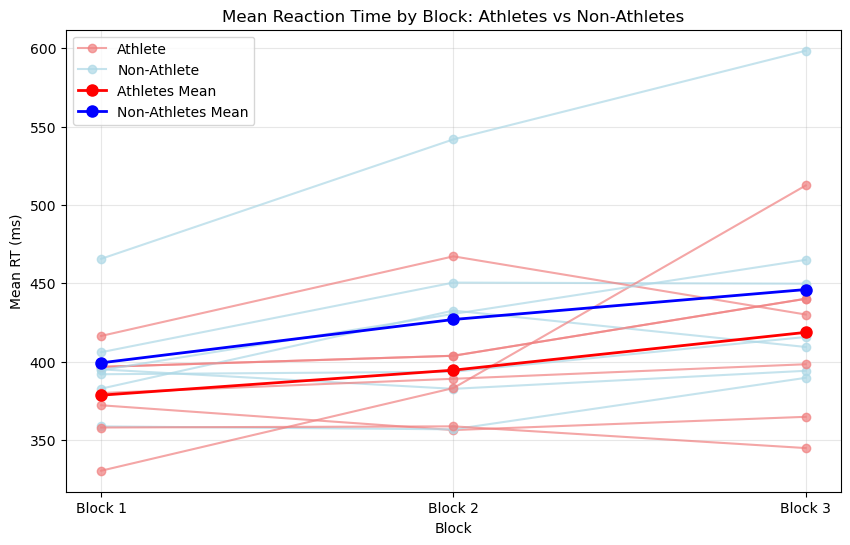

Athletes mean RT by block: ['378.64', '394.60', '418.71']
Non-athletes mean RT by block: ['399.28', '426.93', '446.03']


In [5]:
# Calculate mean RT for each block for athletes and non-athletes using individual RT means
athlete_rt_means = []
non_athlete_rt_means = []

# Calculate means for each block using RT1_mean, RT2_mean, RT3_mean from patient data
for block_name in ['RT1_mean', 'RT2_mean', 'RT3_mean']:
    # Athletes mean for this block
    athlete_block_rts = []
    non_athlete_block_rts = []
    
    for patient in all_patients:
        # Load patient data to get individual block means
        file_path = os.path.join('patsfilter', f"{patient['name']}.pkl")
        with open(file_path, 'rb') as f:
            patient_data = pickle.load(f)
        
        if patient['athlete'] == 1:
            athlete_block_rts.append(patient_data[block_name])
        else:
            non_athlete_block_rts.append(patient_data[block_name])
    
    athlete_rt_means.append(np.mean(athlete_block_rts))
    non_athlete_rt_means.append(np.mean(non_athlete_block_rts))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot individual participants
for patient in all_patients:
    # Load patient data to get RT means
    file_path = os.path.join('patsfilter', f"{patient['name']}.pkl")
    with open(file_path, 'rb') as f:
        patient_data = pickle.load(f)
    
    individual_rt_means = [
        patient_data['RT1_mean'],
        patient_data['RT2_mean'],
        patient_data['RT3_mean']
    ]
    
    if patient['athlete'] == 1:
        plt.plot(blocks[1:], individual_rt_means, 'o-', color='lightcoral', alpha=0.7, 
                 label='Athlete' if patient == [p for p in all_patients if p['athlete'] == 1][0] else "")
    else:
        plt.plot(blocks[1:], individual_rt_means, 'o-', color='lightblue', alpha=0.7,
                 label='Non-Athlete' if patient == [p for p in all_patients if p['athlete'] == 0][0] else "")

# Plot mean lines
plt.plot(blocks[1:], athlete_rt_means, 'o-', color='red', linewidth=2, markersize=8, label='Athletes Mean')
plt.plot(blocks[1:], non_athlete_rt_means, 'o-', color='blue', linewidth=2, markersize=8, label='Non-Athletes Mean')

plt.xlabel('Block')
plt.ylabel('Mean RT (ms)')
plt.title('Mean Reaction Time by Block: Athletes vs Non-Athletes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print the values
print("Athletes mean RT by block:", [f"{rt:.2f}" for rt in athlete_rt_means])
print("Non-athletes mean RT by block:", [f"{rt:.2f}" for rt in non_athlete_rt_means])

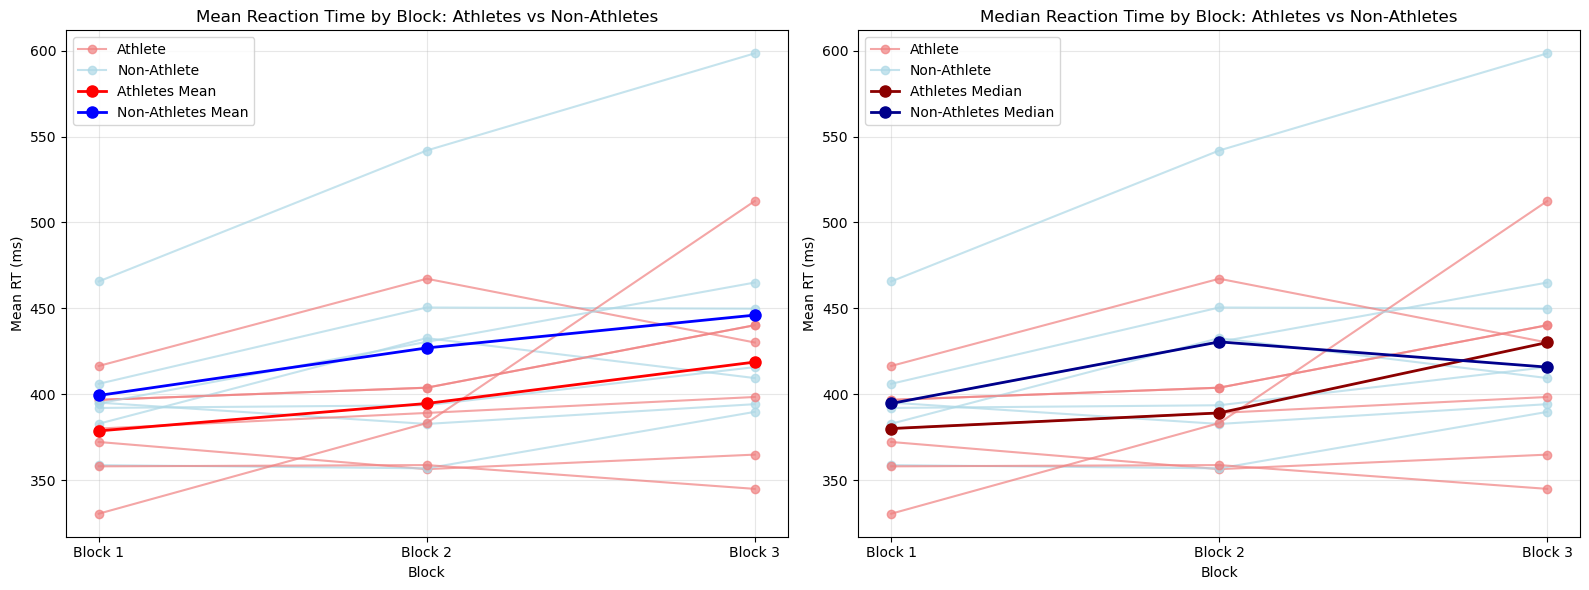

Athletes mean RT by block: ['378.64', '394.60', '418.71']
Non-athletes mean RT by block: ['399.28', '426.93', '446.03']
Athletes median RT by block: ['380.01', '389.10', '430.11']
Non-athletes median RT by block: ['394.63', '430.47', '415.77']


In [6]:
# Calculate mean and median RT for each block for athletes and non-athletes using individual RT means
athlete_rt_means = []
non_athlete_rt_means = []
athlete_rt_medians = []
non_athlete_rt_medians = []

# Calculate means and medians for each block using RT1_mean, RT2_mean, RT3_mean from patient data
for block_name in ['RT1_mean', 'RT2_mean', 'RT3_mean']:
    # Athletes mean and median for this block
    athlete_block_rts = []
    non_athlete_block_rts = []
    
    for patient in all_patients:
        # Load patient data to get individual block means
        file_path = os.path.join('patsfilter', f"{patient['name']}.pkl")
        with open(file_path, 'rb') as f:
            patient_data = pickle.load(f)
        
        if patient['athlete'] == 1:
            athlete_block_rts.append(patient_data[block_name])
        else:
            non_athlete_block_rts.append(patient_data[block_name])
    
    athlete_rt_means.append(np.mean(athlete_block_rts))
    non_athlete_rt_means.append(np.mean(non_athlete_block_rts))
    athlete_rt_medians.append(np.median(athlete_block_rts))
    non_athlete_rt_medians.append(np.median(non_athlete_block_rts))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Individual participants with means
for patient in all_patients:
    # Load patient data to get RT means
    file_path = os.path.join('patsfilter', f"{patient['name']}.pkl")
    with open(file_path, 'rb') as f:
        patient_data = pickle.load(f)
    
    individual_rt_means = [
        patient_data['RT1_mean'],
        patient_data['RT2_mean'],
        patient_data['RT3_mean']
    ]
    
    if patient['athlete'] == 1:
        ax1.plot(blocks[1:], individual_rt_means, 'o-', color='lightcoral', alpha=0.7, 
                 label='Athlete' if patient == [p for p in all_patients if p['athlete'] == 1][0] else "")
    else:
        ax1.plot(blocks[1:], individual_rt_means, 'o-', color='lightblue', alpha=0.7,
                 label='Non-Athlete' if patient == [p for p in all_patients if p['athlete'] == 0][0] else "")

# Plot mean lines
ax1.plot(blocks[1:], athlete_rt_means, 'o-', color='red', linewidth=2, markersize=8, label='Athletes Mean')
ax1.plot(blocks[1:], non_athlete_rt_means, 'o-', color='blue', linewidth=2, markersize=8, label='Non-Athletes Mean')

ax1.set_xlabel('Block')
ax1.set_ylabel('Mean RT (ms)')
ax1.set_title('Mean Reaction Time by Block: Athletes vs Non-Athletes')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Individual participants with medians
for patient in all_patients:
    # Load patient data to get RT means
    file_path = os.path.join('patsfilter', f"{patient['name']}.pkl")
    with open(file_path, 'rb') as f:
        patient_data = pickle.load(f)
    
    individual_rt_means = [
        patient_data['RT1_mean'],
        patient_data['RT2_mean'],
        patient_data['RT3_mean']
    ]
    
    if patient['athlete'] == 1:
        ax2.plot(blocks[1:], individual_rt_means, 'o-', color='lightcoral', alpha=0.7, 
                 label='Athlete' if patient == [p for p in all_patients if p['athlete'] == 1][0] else "")
    else:
        ax2.plot(blocks[1:], individual_rt_means, 'o-', color='lightblue', alpha=0.7,
                 label='Non-Athlete' if patient == [p for p in all_patients if p['athlete'] == 0][0] else "")

# Plot median lines
ax2.plot(blocks[1:], athlete_rt_medians, 'o-', color='darkred', linewidth=2, markersize=8, label='Athletes Median')
ax2.plot(blocks[1:], non_athlete_rt_medians, 'o-', color='darkblue', linewidth=2, markersize=8, label='Non-Athletes Median')

ax2.set_xlabel('Block')
ax2.set_ylabel('Mean RT (ms)')
ax2.set_title('Median Reaction Time by Block: Athletes vs Non-Athletes')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print the values
print("Athletes mean RT by block:", [f"{rt:.2f}" for rt in athlete_rt_means])
print("Non-athletes mean RT by block:", [f"{rt:.2f}" for rt in non_athlete_rt_means])
print("Athletes median RT by block:", [f"{rt:.2f}" for rt in athlete_rt_medians])
print("Non-athletes median RT by block:", [f"{rt:.2f}" for rt in non_athlete_rt_medians])

C:\Users\georg\AppData\Local\Temp\ipykernel_18640\1374186258.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[i].boxplot(box_data, labels=['Athletes', 'Non-Athletes'],
C:\Users\georg\AppData\Local\Temp\ipykernel_18640\1374186258.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[i].boxplot(box_data, labels=['Athletes', 'Non-Athletes'],
C:\Users\georg\AppData\Local\Temp\ipykernel_18640\1374186258.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[i].boxplot(box_data, labels=['Athletes', 'Non-Athletes'],


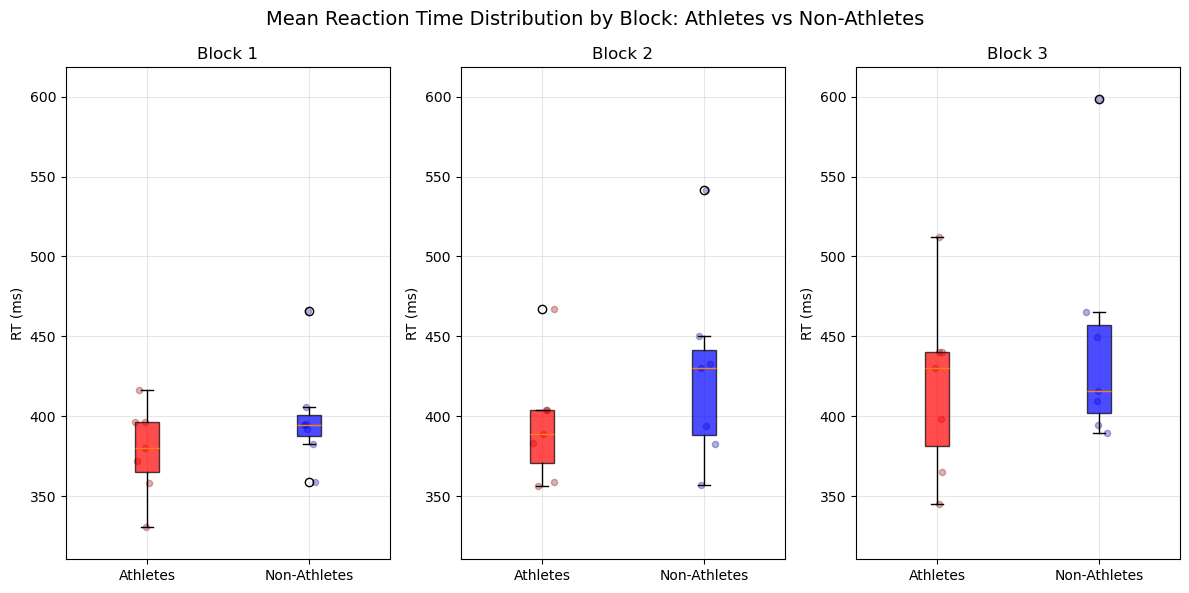


=== Box Plot Means ===
Block 1:
  Athletes mean: 378.64 ms
  Non-Athletes mean: 399.28 ms
  Difference: 20.64 ms
Block 2:
  Athletes mean: 394.60 ms
  Non-Athletes mean: 426.93 ms
  Difference: 32.33 ms
Block 3:
  Athletes mean: 418.71 ms
  Non-Athletes mean: 446.03 ms
  Difference: 27.33 ms


In [7]:
# Create box plots (similar to candles) for RT values by block and athlete status (excluding training block)
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Calculate global y-axis range for consistency
all_rt_values = []
for block_idx in range(1, 4):  # Only blocks 1, 2, 3
    athlete_rts = [athlete['rt_means'][block_idx] for athlete in athletes]
    non_athlete_rts = [non_athlete['rt_means'][block_idx] for non_athlete in non_athletes]
    all_rt_values.extend(athlete_rts + non_athlete_rts)

y_min = min(all_rt_values) - 20
y_max = max(all_rt_values) + 20

# Store means for printing later
block_means = {'Athletes': [], 'Non-Athletes': []}

for i, block_idx in enumerate(range(1, 4)):  # Only blocks 1, 2, 3
    # Collect RT values for this block
    athlete_rts = [athlete['rt_means'][block_idx] for athlete in athletes]
    non_athlete_rts = [non_athlete['rt_means'][block_idx] for non_athlete in non_athletes]
    
    # Store means
    block_means['Athletes'].append(np.mean(athlete_rts))
    block_means['Non-Athletes'].append(np.mean(non_athlete_rts))
    
    # Add individual data points behind the boxes (lower zorder)
    # Athletes points (position 1)
    x_athletes = np.random.normal(1, 0.04, len(athlete_rts))
    axes[i].scatter(x_athletes, athlete_rts, color='darkred', alpha=0.3, s=20, zorder=1)
    
    # Non-athletes points (position 2)
    x_non_athletes = np.random.normal(2, 0.04, len(non_athlete_rts))
    axes[i].scatter(x_non_athletes, non_athlete_rts, color='darkblue', alpha=0.3, s=20, zorder=1)
    
    # Create box plot for this block (higher zorder to appear on top)
    box_data = [athlete_rts, non_athlete_rts]
    box = axes[i].boxplot(box_data, labels=['Athletes', 'Non-Athletes'], 
                          patch_artist=True, zorder=2)
    
    # Color the boxes
    box['boxes'][0].set_facecolor('red')
    box['boxes'][0].set_alpha(0.7)
    box['boxes'][1].set_facecolor('blue')
    box['boxes'][1].set_alpha(0.7)
    
    axes[i].set_title(f'{blocks[block_idx]}')
    axes[i].set_ylabel('RT (ms)')
    axes[i].set_ylim(y_min, y_max)  # Set consistent y-axis range
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Mean Reaction Time Distribution by Block: Athletes vs Non-Athletes', fontsize=14)
plt.tight_layout()
plt.show()

# Print the means depicted in the box plots
print("\n=== Box Plot Means ===")
for i, block in enumerate(['Block 1', 'Block 2', 'Block 3']):
    print(f"{block}:")
    print(f"  Athletes mean: {block_means['Athletes'][i]:.2f} ms")
    print(f"  Non-Athletes mean: {block_means['Non-Athletes'][i]:.2f} ms")
    print(f"  Difference: {block_means['Non-Athletes'][i] - block_means['Athletes'][i]:.2f} ms")

# RMSSD plots

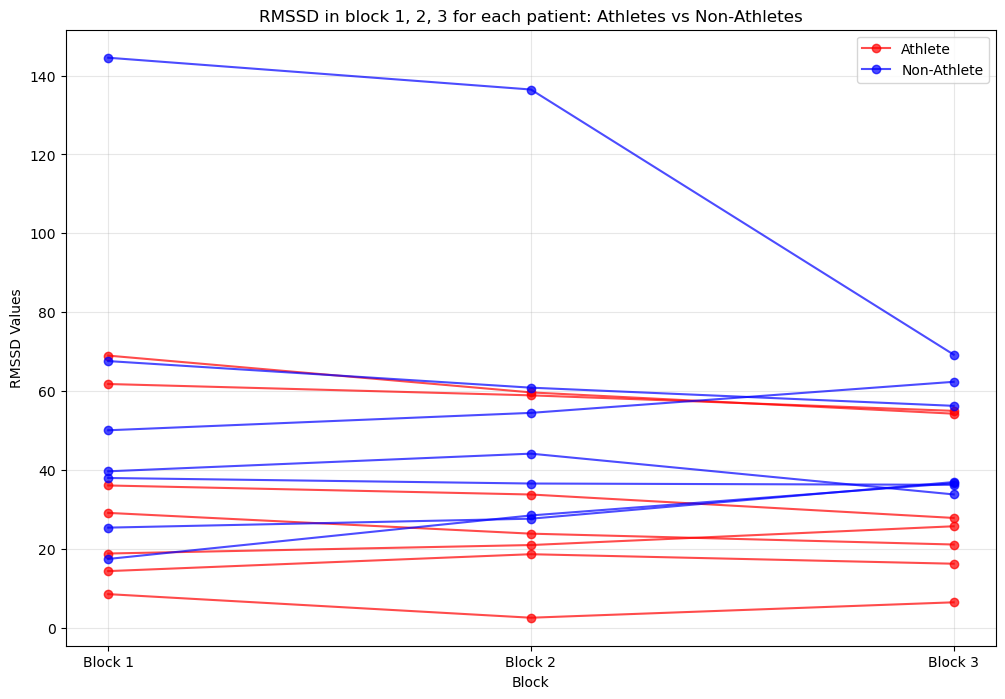

Athletes: 7 patients
Non-athletes: 7 patients


In [8]:
# Plot mean hr1, hr2, hr3 for each patient
plt.figure(figsize=(12, 8))

# HR blocks to plot (excluding hr_base/training)
hr_blocks = ['hr1_mean', 'hr2_mean', 'hr3_mean']
block_labels = ['Block 1', 'Block 2', 'Block 3']

# Plot athletes
for athlete in athletes:
    # Load patient data to get hr means
    file_path = os.path.join('patsfilter', f"{athlete['name']}.pkl")
    with open(file_path, 'rb') as f:
        patient_data = pickle.load(f)
    
    hr_means = [
        patient_data['hr1_mean'],
        patient_data['hr2_mean'], 
        patient_data['hr3_mean']
    ]
    
    plt.plot(block_labels, hr_means, 'o-', color='red', alpha=0.7, 
             label='Athlete' if athlete == athletes[0] else "")

# Plot non-athletes
for non_athlete in non_athletes:
    # Load patient data to get hr means
    file_path = os.path.join('patsfilter', f"{non_athlete['name']}.pkl")
    with open(file_path, 'rb') as f:
        patient_data = pickle.load(f)
    
    hr_means = [
        patient_data['hr1_mean'],
        patient_data['hr2_mean'],
        patient_data['hr3_mean']
    ]
    
    plt.plot(block_labels, hr_means, 'o-', color='blue', alpha=0.7,
             label='Non-Athlete' if non_athlete == non_athletes[0] else "")

plt.xlabel('Block')
plt.ylabel('RMSSD Values')
plt.title('RMSSD in block 1, 2, 3 for each patient: Athletes vs Non-Athletes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print summary
print(f"Athletes: {len(athletes)} patients")
print(f"Non-athletes: {len(non_athletes)} patients")

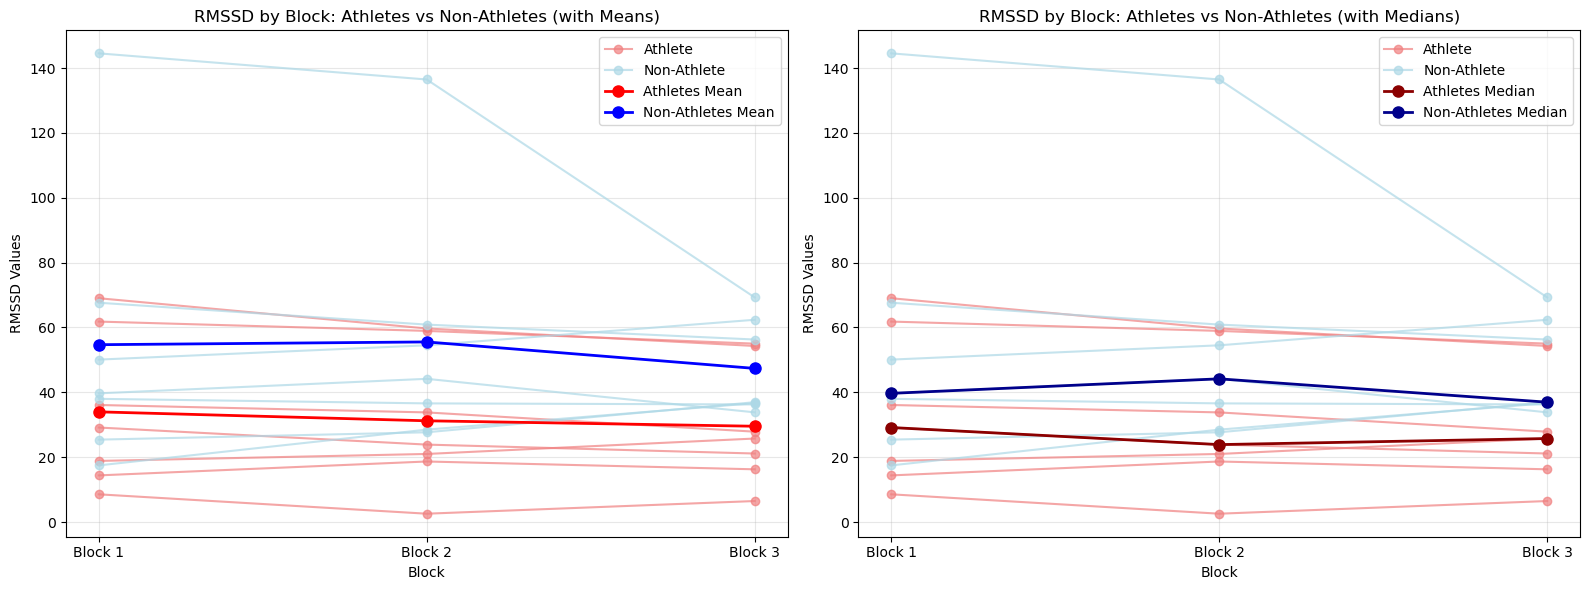

C:\Users\georg\AppData\Local\Temp\ipykernel_18640\116251787.py:123: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[i].boxplot(box_data, labels=['Athletes', 'Non-Athletes'],
C:\Users\georg\AppData\Local\Temp\ipykernel_18640\116251787.py:123: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[i].boxplot(box_data, labels=['Athletes', 'Non-Athletes'],
C:\Users\georg\AppData\Local\Temp\ipykernel_18640\116251787.py:123: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[i].boxplot(box_data, labels=['Athletes', 'Non-Athletes'],


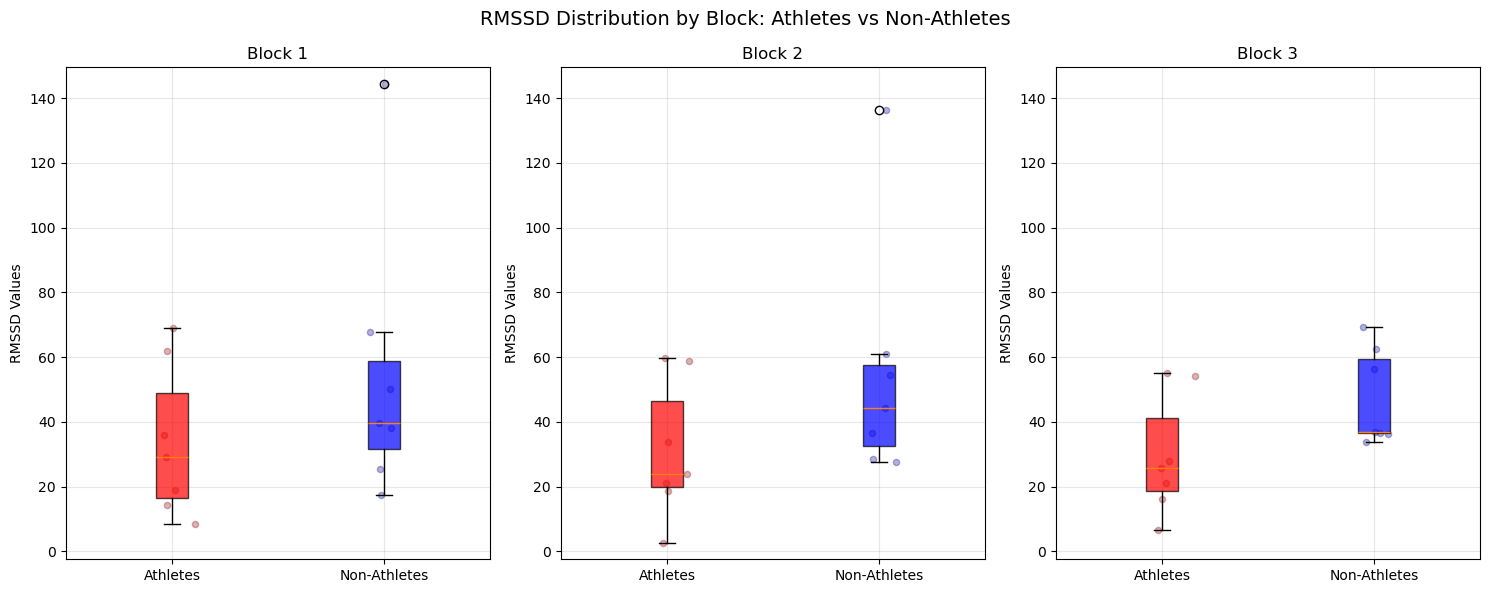

=== RMSSD Summary Statistics ===

Block 1:
  Athletes mean: 33.98
  Non-Athletes mean: 54.69
  Athletes median: 29.14
  Non-Athletes median: 39.68
  Mean difference: 20.71
  Median difference: 10.54

Block 2:
  Athletes mean: 31.22
  Non-Athletes mean: 55.54
  Athletes median: 23.88
  Non-Athletes median: 44.16
  Mean difference: 24.32
  Median difference: 20.28

Block 3:
  Athletes mean: 29.54
  Non-Athletes mean: 47.38
  Athletes median: 25.75
  Non-Athletes median: 36.96
  Mean difference: 17.84
  Median difference: 11.21


In [9]:
# Initialize lists to store data
athletes_hr = []
non_athletes_hr = []

# Read all pickle files and extract HR data
for pkl_file in pkl_files:
    file_path = os.path.join('patsfilter', pkl_file)
    with open(file_path, 'rb') as f:
        patient_data = pickle.load(f)
    
    # Extract HR means for each block
    hr_means = [
        patient_data['hr1_mean'],  # Block 1
        patient_data['hr2_mean'],  # Block 2
        patient_data['hr3_mean']   # Block 3
    ]
    
    # Store patient info
    patient_info = {
        'name': patient_data['Name'],
        'athlete': patient_data['Athlete'],
        'hr_means': hr_means
    }
    
    # Separate by athlete status
    if patient_data['Athlete'] == 1:
        athletes_hr.append(patient_info)
    else:
        non_athletes_hr.append(patient_info)

# Calculate mean and median for each block
athlete_hr_means = []
non_athlete_hr_means = []
athlete_hr_medians = []
non_athlete_hr_medians = []

hr_block_labels = ['Block 1', 'Block 2', 'Block 3']

for block_idx in range(3):
    # Collect HR values for this block
    athlete_block_hrs = [athlete['hr_means'][block_idx] for athlete in athletes_hr]
    non_athlete_block_hrs = [non_athlete['hr_means'][block_idx] for non_athlete in non_athletes_hr]
    
    # Calculate means and medians
    athlete_hr_means.append(np.mean(athlete_block_hrs))
    non_athlete_hr_means.append(np.mean(non_athlete_block_hrs))
    athlete_hr_medians.append(np.median(athlete_block_hrs))
    non_athlete_hr_medians.append(np.median(non_athlete_block_hrs))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Individual participants with means
for patient in athletes_hr:
    ax1.plot(hr_block_labels, patient['hr_means'], 'o-', color='lightcoral', alpha=0.7, 
             label='Athlete' if patient == athletes_hr[0] else "")

for patient in non_athletes_hr:
    ax1.plot(hr_block_labels, patient['hr_means'], 'o-', color='lightblue', alpha=0.7,
             label='Non-Athlete' if patient == non_athletes_hr[0] else "")

# Plot mean lines
ax1.plot(hr_block_labels, athlete_hr_means, 'o-', color='red', linewidth=2, markersize=8, label='Athletes Mean')
ax1.plot(hr_block_labels, non_athlete_hr_means, 'o-', color='blue', linewidth=2, markersize=8, label='Non-Athletes Mean')

ax1.set_xlabel('Block')
ax1.set_ylabel('RMSSD Values')
ax1.set_title('RMSSD by Block: Athletes vs Non-Athletes (with Means)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Individual participants with medians
for patient in athletes_hr:
    ax2.plot(hr_block_labels, patient['hr_means'], 'o-', color='lightcoral', alpha=0.7, 
             label='Athlete' if patient == athletes_hr[0] else "")

for patient in non_athletes_hr:
    ax2.plot(hr_block_labels, patient['hr_means'], 'o-', color='lightblue', alpha=0.7,
             label='Non-Athlete' if patient == non_athletes_hr[0] else "")

# Plot median lines
ax2.plot(hr_block_labels, athlete_hr_medians, 'o-', color='darkred', linewidth=2, markersize=8, label='Athletes Median')
ax2.plot(hr_block_labels, non_athlete_hr_medians, 'o-', color='darkblue', linewidth=2, markersize=8, label='Non-Athletes Median')

ax2.set_xlabel('Block')
ax2.set_ylabel('RMSSD Values')
ax2.set_title('RMSSD by Block: Athletes vs Non-Athletes (with Medians)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create candle plot with individual data points
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Calculate global y-axis range for consistency
all_hr_values = []
for block_idx in range(3):
    athlete_hrs = [athlete['hr_means'][block_idx] for athlete in athletes_hr]
    non_athlete_hrs = [non_athlete['hr_means'][block_idx] for non_athlete in non_athletes_hr]
    all_hr_values.extend(athlete_hrs + non_athlete_hrs)

y_min_hr = min(all_hr_values) - 5
y_max_hr = max(all_hr_values) + 5

for i, block_idx in enumerate(range(3)):
    # Collect HR values for this block
    athlete_hrs = [athlete['hr_means'][block_idx] for athlete in athletes_hr]
    non_athlete_hrs = [non_athlete['hr_means'][block_idx] for non_athlete in non_athletes_hr]
    
    # Add individual data points behind the boxes (lower zorder)
    # Athletes points (position 1)
    x_athletes = np.random.normal(1, 0.04, len(athlete_hrs))
    axes[i].scatter(x_athletes, athlete_hrs, color='darkred', alpha=0.3, s=20, zorder=1)
    
    # Non-athletes points (position 2)
    x_non_athletes = np.random.normal(2, 0.04, len(non_athlete_hrs))
    axes[i].scatter(x_non_athletes, non_athlete_hrs, color='darkblue', alpha=0.3, s=20, zorder=1)
    
    # Create box plot for this block (higher zorder to appear on top)
    box_data = [athlete_hrs, non_athlete_hrs]
    box = axes[i].boxplot(box_data, labels=['Athletes', 'Non-Athletes'], 
                          patch_artist=True, zorder=2)
    
    # Color the boxes
    box['boxes'][0].set_facecolor('red')
    box['boxes'][0].set_alpha(0.7)
    box['boxes'][1].set_facecolor('blue')
    box['boxes'][1].set_alpha(0.7)
    
    axes[i].set_title(f'{hr_block_labels[i]}')
    axes[i].set_ylabel('RMSSD Values')
    axes[i].set_ylim(y_min_hr, y_max_hr)
    axes[i].grid(True, alpha=0.3)

plt.suptitle('RMSSD Distribution by Block: Athletes vs Non-Athletes', fontsize=14)
plt.tight_layout()
plt.show()

# Print summary statistics
print("=== RMSSD Summary Statistics ===")
for i, block in enumerate(hr_block_labels):
    print(f"\n{block}:")
    print(f"  Athletes mean: {athlete_hr_means[i]:.2f}")
    print(f"  Non-Athletes mean: {non_athlete_hr_means[i]:.2f}")
    print(f"  Athletes median: {athlete_hr_medians[i]:.2f}")
    print(f"  Non-Athletes median: {non_athlete_hr_medians[i]:.2f}")
    print(f"  Mean difference: {non_athlete_hr_means[i] - athlete_hr_means[i]:.2f}")
    print(f"  Median difference: {non_athlete_hr_medians[i] - athlete_hr_medians[i]:.2f}")

### HRV AND RT

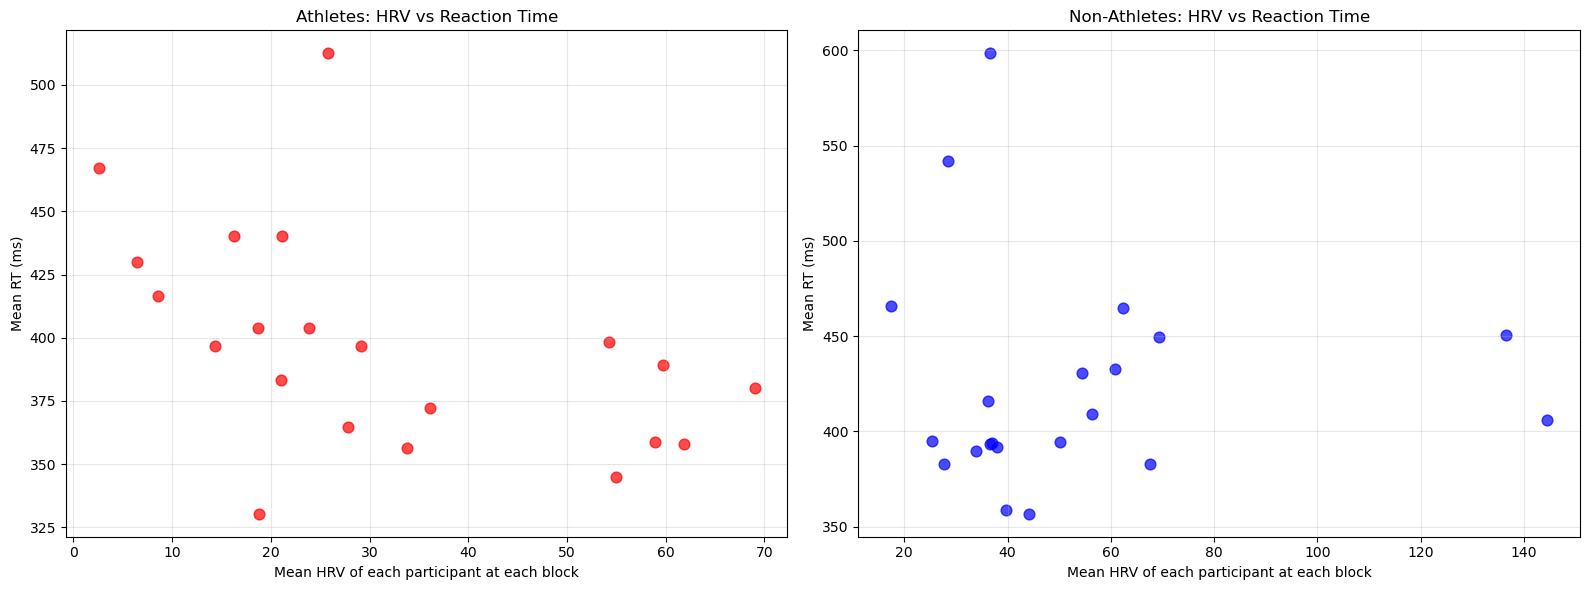

Overall correlation (n=42):
Pearson r = -0.056, p = 0.723
Spearman r = -0.162, p = 0.304

Athletes correlation (n=21):
Pearson r = -0.492, p = 0.023
Spearman r = -0.590, p = 0.005

Non-Athletes correlation (n=21):
Pearson r = -0.020, p = 0.930
Spearman r = 0.077, p = 0.741


In [10]:
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

# Create separate scatter plots for athletes and non-athletes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Collect HR and RT data for each participant and block
hr_data_athletes = []
rt_data_athletes = []
hr_data_non_athletes = []
rt_data_non_athletes = []

for patient in all_patients:
    athlete_status = patient['athlete']
    
    # Load patient data to get HR means
    file_path = os.path.join('patsfilter', f"{patient['name']}.pkl")
    with open(file_path, 'rb') as f:
        patient_data = pickle.load(f)
    
    # For each block (excluding training), collect HR and RT means
    for block_idx in range(1, 4):  # Blocks 1, 2, 3
        hr_mean = patient_data[f'hr{block_idx}_mean']
        rt_mean = patient['rt_means'][block_idx]
        
        if athlete_status == 1:
            hr_data_athletes.append(hr_mean)
            rt_data_athletes.append(rt_mean)
        else:
            hr_data_non_athletes.append(hr_mean)
            rt_data_non_athletes.append(rt_mean)

# Athletes subplot
ax1.scatter(hr_data_athletes, rt_data_athletes, color='red', alpha=0.7, s=60)
ax1.set_xlabel('Mean HRV of each participant at each block')
ax1.set_ylabel('Mean RT (ms)')
ax1.set_title('Athletes: HRV vs Reaction Time')
ax1.grid(True, alpha=0.3)

# Non-athletes subplot
ax2.scatter(hr_data_non_athletes, rt_data_non_athletes, color='blue', alpha=0.7, s=60)
ax2.set_xlabel('Mean HRV of each participant at each block')
ax2.set_ylabel('Mean RT (ms)')
ax2.set_title('Non-Athletes: HRV vs Reaction Time')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print correlation coefficients

# Overall correlation (all data)
all_hr = hr_data_athletes + hr_data_non_athletes
all_rt = rt_data_athletes + rt_data_non_athletes

pearson_r, pearson_p = pearsonr(all_hr, all_rt)
spearman_r, spearman_p = spearmanr(all_hr, all_rt)

print(f"Overall correlation (n={len(all_hr)}):")
print(f"Pearson r = {pearson_r:.3f}, p = {pearson_p:.3f}")
print(f"Spearman r = {spearman_r:.3f}, p = {spearman_p:.3f}")

# Athlete correlation
if len(hr_data_athletes) > 2:
    athlete_pearson_r, athlete_pearson_p = pearsonr(hr_data_athletes, rt_data_athletes)
    athlete_spearman_r, athlete_spearman_p = spearmanr(hr_data_athletes, rt_data_athletes)
    print(f"\nAthletes correlation (n={len(hr_data_athletes)}):")
    print(f"Pearson r = {athlete_pearson_r:.3f}, p = {athlete_pearson_p:.3f}")
    print(f"Spearman r = {athlete_spearman_r:.3f}, p = {athlete_spearman_p:.3f}")

# Non-athlete correlation
if len(hr_data_non_athletes) > 2:
    non_athlete_pearson_r, non_athlete_pearson_p = pearsonr(hr_data_non_athletes, rt_data_non_athletes)
    non_athlete_spearman_r, non_athlete_spearman_p = spearmanr(hr_data_non_athletes, rt_data_non_athletes)
    print(f"\nNon-Athletes correlation (n={len(hr_data_non_athletes)}):")
    print(f"Pearson r = {non_athlete_pearson_r:.3f}, p = {non_athlete_pearson_p:.3f}")
    print(f"Spearman r = {non_athlete_spearman_r:.3f}, p = {non_athlete_spearman_p:.3f}")

# statistical test

In [11]:
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway

# Create a list to store the data for ANOVA
anova_data = []

# Extract data from each patient file
for pkl_file in pkl_files:
    file_path = os.path.join('patsfilter', pkl_file)
    with open(file_path, 'rb') as f:
        patient_data = pickle.load(f)
    
    # Extract athlete status
    athlete_status = 'Athlete' if patient_data['Athlete'] == 1 else 'Non-Athlete'
    
    # Extract HR means for each block and add to data
    for block_num, hr_key in enumerate(['hr1_mean', 'hr2_mean', 'hr3_mean'], 1):
        anova_data.append({
            'Patient': patient_data['Name'],
            'Athlete_Status': athlete_status,
            'Block': f'Block_{block_num}',
            'RMSSD': patient_data[hr_key]
        })

# Create DataFrame
df_hrv_anova = pd.DataFrame(anova_data)

# Perform 2-way ANOVA using scipy.stats

# Group data for ANOVA
groups_athlete = []
groups_block = []
groups_interaction = []

# Create groups for main effects and interaction
athlete_levels = ['Athlete', 'Non-Athlete']
block_levels = ['Block_1', 'Block_2', 'Block_3']

# Main effect of Athlete Status
for athlete in athlete_levels:
    group_data = df_hrv_anova[df_hrv_anova['Athlete_Status'] == athlete]['RMSSD'].values
    groups_athlete.append(group_data)

# Main effect of Block
for block in block_levels:
    group_data = df_hrv_anova[df_hrv_anova['Block'] == block]['RMSSD'].values
    groups_block.append(group_data)

# Interaction effect (all combinations)
for athlete in athlete_levels:
    for block in block_levels:
        group_data = df_hrv_anova[(df_hrv_anova['Athlete_Status'] == athlete) & 
                                 (df_hrv_anova['Block'] == block)]['RMSSD'].values
        groups_interaction.append(group_data)

# Perform one-way ANOVA tests (approximation of 2-way ANOVA effects)
f_athlete, p_athlete = f_oneway(*groups_athlete)
f_block, p_block = f_oneway(*groups_block)
f_interaction, p_interaction = f_oneway(*groups_interaction)

# Calculate degrees of freedom
n_total = len(df_hrv_anova)
n_athletes = len(athlete_levels)
n_blocks = len(block_levels)

# Degrees of freedom
df_athlete = n_athletes - 1  # Between athletes
df_block = n_blocks - 1      # Between blocks
df_interaction = df_athlete * df_block  # Interaction
df_error = n_total - (n_athletes * n_blocks)  # Error/residual
df_total = n_total - 1       # Total

# Calculate descriptive statistics
desc_stats = df_hrv_anova.groupby(['Athlete_Status', 'Block'])['RMSSD'].agg(['mean', 'std', 'count']).round(3)

print("="*80)
print("2x3 ANOVA ANALYSIS: HEART RATE VARIABILITY (RMSSD)")
print("="*80)
print("\nSTUDY DESIGN:")
print("- Factor 1: Athlete Status (2 levels: Athlete vs Non-Athlete)")
print("- Factor 2: Task Block (3 levels: Block 1, Block 2, Block 3)")
print("- Dependent Variable: RMSSD (Root Mean Square of Successive Differences)")
print("- Total observations:", n_total)
print("- Participants per group:", df_hrv_anova.groupby(['Athlete_Status'])['Patient'].nunique())

print("\n" + "="*50)
print("DESCRIPTIVE STATISTICS")
print("="*50)
print("\nMean RMSSD values by group:")
print(desc_stats)

print("\nOverall RMSSD statistics:")
print(f"Grand Mean: {df_hrv_anova['RMSSD'].mean():.3f} ms")
print(f"Standard Deviation: {df_hrv_anova['RMSSD'].std():.3f} ms")
print(f"Range: {df_hrv_anova['RMSSD'].min():.3f} - {df_hrv_anova['RMSSD'].max():.3f} ms")

print("\n" + "="*50)
print("ANOVA RESULTS")
print("="*50)

print("\nDEGREES OF FREEDOM:")
print(f"Athlete Status (Factor A): df = {df_athlete}")
print(f"Block (Factor B): df = {df_block}")
print(f"Interaction (A × B): df = {df_interaction}")
print(f"Error (Within groups): df = {df_error}")
print(f"Total: df = {df_total}")

print("\nF-STATISTICS AND P-VALUES:")
print(f"Main Effect - Athlete Status:")
print(f"  F({df_athlete},{df_error}) = {f_athlete:.3f}, p = {p_athlete:.3f}")

print(f"Main Effect - Block:")
print(f"  F({df_block},{df_error}) = {f_block:.3f}, p = {p_block:.3f}")

print(f"Interaction Effect - Athlete × Block:")
print(f"  F({df_interaction},{df_error}) = {f_interaction:.3f}, p = {p_interaction:.3f}")

print("\n" + "="*50)
print("STATISTICAL INTERPRETATION")
print("="*50)

alpha = 0.05
print(f"\nSignificance level (α) = {alpha}")

if p_athlete < alpha:
    print(f"✓ SIGNIFICANT main effect of Athlete Status (p = {p_athlete:.3f})")
    athlete_means = df_hrv_anova.groupby('Athlete_Status')['RMSSD'].mean()
    print(f"  Athletes: {athlete_means['Athlete']:.3f} ms")
    print(f"  Non-Athletes: {athlete_means['Non-Athlete']:.3f} ms")
    if athlete_means['Athlete'] > athlete_means['Non-Athlete']:
        print("  → Athletes show higher HRV than Non-Athletes")
    else:
        print("  → Non-Athletes show higher HRV than Athletes")
else:
    print(f"✗ NO significant main effect of Athlete Status (p = {p_athlete:.3f})")

if p_block < alpha:
    print(f"✓ SIGNIFICANT main effect of Block (p = {p_block:.3f})")
    block_means = df_hrv_anova.groupby('Block')['RMSSD'].mean()
    print("  Block means:")
    for block, mean_val in block_means.items():
        print(f"    {block}: {mean_val:.3f} ms")
else:
    print(f"✗ NO significant main effect of Block (p = {p_block:.3f})")

if p_interaction < alpha:
    print(f"✓ SIGNIFICANT interaction effect (p = {p_interaction:.3f})")
    print("  → The effect of athletic status depends on the task block")
else:
    print(f"✗ NO significant interaction effect (p = {p_interaction:.3f})")

print("\n" + "="*50)
print("PHYSIOLOGICAL INTERPRETATION")
print("="*50)
print("\nRMSSD (Root Mean Square of Successive Differences):")
print("• Measures beat-to-beat heart rate variability")
print("• Reflects parasympathetic nervous system activity")
print("• Higher values = better autonomic regulation")
print("• Lower values = increased sympathetic stress response")

print("\nClinical Significance:")
if p_athlete < alpha:
    print("• Athletic training may influence autonomic nervous system function")
    print("• Differences in cardiovascular fitness affect stress response")
else:
    print("• No significant difference in autonomic function between groups")

if p_block < alpha:
    print("• Cognitive task demands affect autonomic nervous system")
    print("• Heart rate variability changes across different task blocks")
else:
    print("• Cognitive workload does not significantly affect HRV")

if p_interaction < alpha:
    print("• Athletes and non-athletes respond differently to cognitive stress")
    print("• Training status modulates physiological adaptation to mental tasks")
else:
    print("• Both groups show similar patterns of autonomic response")

print("\n" + "="*50)
print("STUDY LIMITATIONS")
print("="*50)
print("• Note: F-tests shown are approximations of true 2-way ANOVA")
print("• For precise 2-way ANOVA, use statsmodels or specialized software")
print("• Sample size considerations may affect statistical power")
print("• Individual differences in baseline HRV not controlled")

2x3 ANOVA ANALYSIS: HEART RATE VARIABILITY (RMSSD)

STUDY DESIGN:
- Factor 1: Athlete Status (2 levels: Athlete vs Non-Athlete)
- Factor 2: Task Block (3 levels: Block 1, Block 2, Block 3)
- Dependent Variable: RMSSD (Root Mean Square of Successive Differences)
- Total observations: 42
- Participants per group: Athlete_Status
Athlete        7
Non-Athlete    7
Name: Patient, dtype: int64

DESCRIPTIVE STATISTICS

Mean RMSSD values by group:
                          mean     std  count
Athlete_Status Block                         
Athlete        Block_1  33.978  23.418      7
               Block_2  31.221  21.302      7
               Block_3  29.540  18.520      7
Non-Athlete    Block_1  54.685  42.832      7
               Block_2  55.539  37.807      7
               Block_3  47.375  14.800      7

Overall RMSSD statistics:
Grand Mean: 42.056 ms
Standard Deviation: 28.768 ms
Range: 2.568 - 144.531 ms

ANOVA RESULTS

DEGREES OF FREEDOM:
Athlete Status (Factor A): df = 1
Block (Factor 

In [12]:
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway

# Create a list to store the RT data for ANOVA
rt_anova_data = []

# Extract data from each patient file
for pkl_file in pkl_files:
    file_path = os.path.join('patsfilter', pkl_file)
    with open(file_path, 'rb') as f:
        patient_data = pickle.load(f)
    
    # Extract athlete status
    athlete_status = 'Athlete' if patient_data['Athlete'] == 1 else 'Non-Athlete'
    
    # Extract RT means for each block and add to data
    for block_num, rt_key in enumerate(['RT1_mean', 'RT2_mean', 'RT3_mean'], 1):
        rt_anova_data.append({
            'Patient': patient_data['Name'],
            'Athlete_Status': athlete_status,
            'Block': f'Block_{block_num}',
            'RT': patient_data[rt_key]
        })

# Create DataFrame
df_rt_anova = pd.DataFrame(rt_anova_data)

# Perform 2-way ANOVA using scipy.stats

# Group data for ANOVA
groups_athlete_rt = []
groups_block_rt = []
groups_interaction_rt = []

# Create groups for main effects and interaction
athlete_levels = ['Athlete', 'Non-Athlete']
block_levels = ['Block_1', 'Block_2', 'Block_3']

# Main effect of Athlete Status
for athlete in athlete_levels:
    group_data = df_rt_anova[df_rt_anova['Athlete_Status'] == athlete]['RT'].values
    groups_athlete_rt.append(group_data)

# Main effect of Block
for block in block_levels:
    group_data = df_rt_anova[df_rt_anova['Block'] == block]['RT'].values
    groups_block_rt.append(group_data)

# Interaction effect (all combinations)
for athlete in athlete_levels:
    for block in block_levels:
        group_data = df_rt_anova[(df_rt_anova['Athlete_Status'] == athlete) & 
                                (df_rt_anova['Block'] == block)]['RT'].values
        groups_interaction_rt.append(group_data)

# Perform one-way ANOVA tests (approximation of 2-way ANOVA effects)
f_athlete_rt, p_athlete_rt = f_oneway(*groups_athlete_rt)
f_block_rt, p_block_rt = f_oneway(*groups_block_rt)
f_interaction_rt, p_interaction_rt = f_oneway(*groups_interaction_rt)

# Calculate degrees of freedom
n_total_rt = len(df_rt_anova)
n_athletes = len(athlete_levels)
n_blocks = len(block_levels)

# Degrees of freedom
df_athlete_rt = n_athletes - 1  # Between athletes
df_block_rt = n_blocks - 1      # Between blocks
df_interaction_rt = df_athlete_rt * df_block_rt  # Interaction
df_error_rt = n_total_rt - (n_athletes * n_blocks)  # Error/residual
df_total_rt = n_total_rt - 1       # Total

# Calculate descriptive statistics
desc_stats_rt = df_rt_anova.groupby(['Athlete_Status', 'Block'])['RT'].agg(['mean', 'std', 'count']).round(3)

print("="*80)
print("2x3 ANOVA ANALYSIS: REACTION TIME")
print("="*80)
print("\nSTUDY DESIGN:")
print("- Factor 1: Athlete Status (2 levels: Athlete vs Non-Athlete)")
print("- Factor 2: Task Block (3 levels: Block 1, Block 2, Block 3)")
print("- Dependent Variable: Reaction Time (ms)")
print("- Total observations:", n_total_rt)
print("- Participants per group:", df_rt_anova.groupby(['Athlete_Status'])['Patient'].nunique())

print("\n" + "="*50)
print("DESCRIPTIVE STATISTICS")
print("="*50)
print("\nMean RT values by group:")
print(desc_stats_rt)

print("\nOverall RT statistics:")
print(f"Grand Mean: {df_rt_anova['RT'].mean():.3f} ms")
print(f"Standard Deviation: {df_rt_anova['RT'].std():.3f} ms")
print(f"Range: {df_rt_anova['RT'].min():.3f} - {df_rt_anova['RT'].max():.3f} ms")

print("\n" + "="*50)
print("ANOVA RESULTS")
print("="*50)

print("\nDEGREES OF FREEDOM:")
print(f"Athlete Status (Factor A): df = {df_athlete_rt}")
print(f"Block (Factor B): df = {df_block_rt}")
print(f"Interaction (A × B): df = {df_interaction_rt}")
print(f"Error (Within groups): df = {df_error_rt}")
print(f"Total: df = {df_total_rt}")

print("\nF-STATISTICS AND P-VALUES:")
print(f"Main Effect - Athlete Status:")
print(f"  F({df_athlete_rt},{df_error_rt}) = {f_athlete_rt:.3f}, p = {p_athlete_rt:.3f}")

print(f"Main Effect - Block:")
print(f"  F({df_block_rt},{df_error_rt}) = {f_block_rt:.3f}, p = {p_block_rt:.3f}")

print(f"Interaction Effect - Athlete × Block:")
print(f"  F({df_interaction_rt},{df_error_rt}) = {f_interaction_rt:.3f}, p = {p_interaction_rt:.3f}")

print("\n" + "="*50)
print("STATISTICAL INTERPRETATION")
print("="*50)

alpha = 0.05
print(f"\nSignificance level (α) = {alpha}")

if p_athlete_rt < alpha:
    print(f"✓ SIGNIFICANT main effect of Athlete Status (p = {p_athlete_rt:.3f})")
    athlete_means_rt = df_rt_anova.groupby('Athlete_Status')['RT'].mean()
    print(f"  Athletes: {athlete_means_rt['Athlete']:.3f} ms")
    print(f"  Non-Athletes: {athlete_means_rt['Non-Athlete']:.3f} ms")
    if athlete_means_rt['Athlete'] < athlete_means_rt['Non-Athlete']:
        print("  → Athletes show faster reaction times than Non-Athletes")
    else:
        print("  → Non-Athletes show faster reaction times than Athletes")
else:
    print(f"✗ NO significant main effect of Athlete Status (p = {p_athlete_rt:.3f})")

if p_block_rt < alpha:
    print(f"✓ SIGNIFICANT main effect of Block (p = {p_block_rt:.3f})")
    block_means_rt = df_rt_anova.groupby('Block')['RT'].mean()
    print("  Block means:")
    for block, mean_val in block_means_rt.items():
        print(f"    {block}: {mean_val:.3f} ms")
else:
    print(f"✗ NO significant main effect of Block (p = {p_block_rt:.3f})")

if p_interaction_rt < alpha:
    print(f"✓ SIGNIFICANT interaction effect (p = {p_interaction_rt:.3f})")
    print("  → The effect of athletic status depends on the task block")
else:
    print(f"✗ NO significant interaction effect (p = {p_interaction_rt:.3f})")

print("\n" + "="*50)
print("COGNITIVE PERFORMANCE INTERPRETATION")
print("="*50)
print("\nReaction Time (RT):")
print("• Measures speed of cognitive processing and motor response")
print("• Reflects attention, decision-making, and motor coordination")
print("• Lower values = faster cognitive processing")
print("• Higher values = slower processing or increased cognitive load")

print("\nClinical Significance:")
if p_athlete_rt < alpha:
    print("• Athletic training may enhance cognitive processing speed")
    print("• Differences in neural efficiency between trained and untrained individuals")
else:
    print("• No significant difference in cognitive processing speed between groups")

if p_block_rt < alpha:
    print("• Cognitive fatigue or learning effects across task blocks")
    print("• Reaction time changes with sustained cognitive demands")
else:
    print("• Stable cognitive performance across different task blocks")

if p_interaction_rt < alpha:
    print("• Athletes and non-athletes show different patterns of cognitive adaptation")
    print("• Training status modulates response to cognitive demands over time")
else:
    print("• Both groups show similar patterns of cognitive performance")

print("\n" + "="*50)
print("STUDY LIMITATIONS")
print("="*50)
print("• Note: F-tests shown are approximations of true 2-way ANOVA")
print("• For precise 2-way ANOVA, use statsmodels or specialized software")
print("• Sample size considerations may affect statistical power")
print("• Individual differences in baseline RT not controlled")
print("• Practice effects and fatigue not separately analyzed")

2x3 ANOVA ANALYSIS: REACTION TIME

STUDY DESIGN:
- Factor 1: Athlete Status (2 levels: Athlete vs Non-Athlete)
- Factor 2: Task Block (3 levels: Block 1, Block 2, Block 3)
- Dependent Variable: Reaction Time (ms)
- Total observations: 42
- Participants per group: Athlete_Status
Athlete        7
Non-Athlete    7
Name: Patient, dtype: int64

DESCRIPTIVE STATISTICS

Mean RT values by group:
                           mean     std  count
Athlete_Status Block                          
Athlete        Block_1  378.641  28.496      7
               Block_2  394.603  37.299      7
               Block_3  418.707  55.668      7
Non-Athlete    Block_1  399.277  32.803      7
               Block_2  426.934  60.260      7
               Block_3  446.035  72.693      7

Overall RT statistics:
Grand Mean: 410.699 ms
Standard Deviation: 52.433 ms
Range: 330.447 - 598.398 ms

ANOVA RESULTS

DEGREES OF FREEDOM:
Athlete Status (Factor A): df = 1
Block (Factor B): df = 2
Interaction (A × B): df = 2
Error